In [1]:
import random

# for a problem
# encoding
def generate_random_value():
    return random.randint(0, 1)

# evaluate
def compute_fitness(individual):
    return sum(gen for gen in individual)

In [8]:
def create_individual(n):
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

# population is sorted according to fitness
def selection(sorted_old_population, m):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)            
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [9]:
n = 20                 # size of individual (chromosome)
m = 20                 # size of population
n_generations = 50     # number of generations

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []

#  create population
population = [create_individual(n) for _ in range(m)]

# loops
for i in range(n_generations):
    # step 1: sort population
    sorted_population = sorted(population, key=compute_fitness)

    if i%1 == 0:        
        fitnesses.append(compute_fitness(sorted_population[-1]))
        print("BEST:", compute_fitness(sorted_population[-1]))      

    new_population = []
    while len(new_population) < m:
        # step2: selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication

        # step3: crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # step4: mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2) 

    population = new_population

BEST: 14
BEST: 15
BEST: 13
BEST: 15
BEST: 14
BEST: 14
BEST: 15
BEST: 16
BEST: 17
BEST: 17
BEST: 17
BEST: 18
BEST: 18
BEST: 18
BEST: 19
BEST: 18
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 20
BEST: 20
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 19
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20


In [6]:
sorted_population = sorted(population, key=compute_fitness)
individual_best = sorted_population[-1]
print(individual_best)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


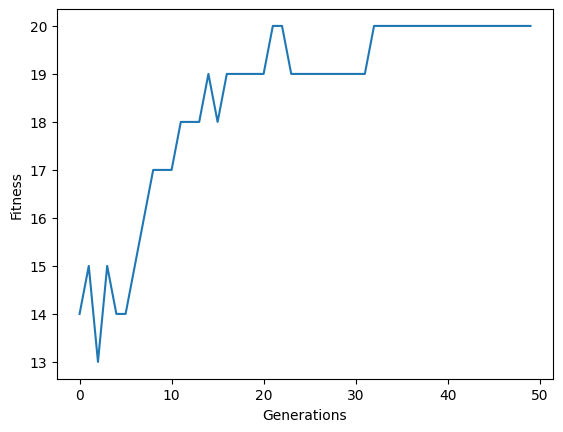

In [10]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

## Elitism

In [11]:
import random

# for a problem
# encoding
def generate_random_value():
    return random.randint(0, 1)

# evaluate
def compute_fitness(individual):
    return sum(gen for gen in individual)

In [12]:
def create_individual(n):
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

# population is sorted according to fitness
def selection(sorted_old_population, m):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)            
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [13]:
n = 20                 # size of individual (chromosome)
m = 20                 # size of population
n_generations = 40     # number of generations

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []

# create population
population = [create_individual(n) for _ in range(m)]

elitism = 2
for i in range(n_generations):
    # step 2: sort population
    sorted_population = sorted(population, key=compute_fitness)
        
    # for debug
    fitnesses.append(compute_fitness(sorted_population[-1]))
    print("BEST:", compute_fitness(sorted_population[-1]))
    
    # elitism
    new_population = sorted_population[-elitism:]
    while len(new_population) < m:
        # step 3: selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication
        
        # step 4: crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # step 5: mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy to new population
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        
    # update population
    population = new_population

BEST: 13
BEST: 15
BEST: 15
BEST: 15
BEST: 15
BEST: 17
BEST: 17
BEST: 17
BEST: 17
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 18
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20


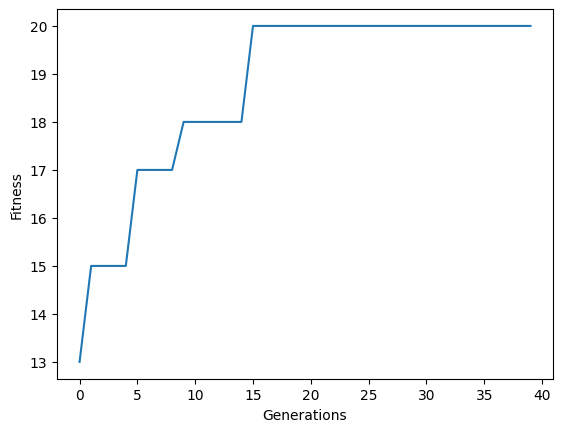

In [14]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

In [9]:
sorted_population = sorted(population, key=compute_fitness)
individual_best = sorted_population[-1]
print(individual_best)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
